In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def damped_harmonic_oscillator_euler(x0, dx0, t0, tmax, N):
    """
    Input:
    x0:  IC for the space variable y
    dx0: IC for the first derivative of the space variable y
    t0:  starting time
    tmax: ending time
    N:   number of timesteps
    
    Return:
    t:   array of time points for which we have solution of y
    y1:  solution for the space variable
    
    """
    h = float(tmax - t0) / float(N)
    t = np.arange(t0, tmax+h, h)
    y1 = np.zeros(N+1)
    y2 = np.zeros(N+1)
    # Initial conditions
    y1[0] = x0
    y2[0] = dx0
    for n in range(0, N-1):
        y1[n+1] = y1[n] + h * y2[n]
        y2[n+1] = (1 - 0.5*h) * y2[n] - h*y1[n]
    return t, y1

def analytic_damHarmOsc(t):
    return np.exp(-t/4.0)/15 * (15 * np.cos(np.sqrt(15) * t/4) + np.sin(np.sqrt(15) * t/4))

# Solve the damped harmonic oscillator using explicit Euler for different timestep sizes h

In [3]:
# Initial conditions
x0 = 1; dx0 = 0
t0 = 0; tmax = 30
N1 = 100
N2 = N1 * 2
N3 = N2 * 2

# If h is given: N = (tmax - t0) / h

t1, x_N1_euler = damped_harmonic_oscillator_euler(x0, dx0, t0, tmax, N1)
t2, x_N2_euler = damped_harmonic_oscillator_euler(x0, dx0, t0, tmax, N2)
t3, x_N3_euler = damped_harmonic_oscillator_euler(x0, dx0, t0, tmax, N3)

In [4]:
x_analytic = [analytic_damHarmOsc(j) for j in t1]

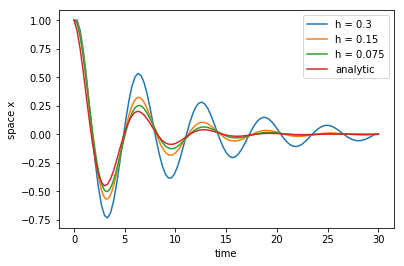

In [5]:
plt.plot(t1, x_N1_euler)
plt.plot(t2, x_N2_euler)
plt.plot(t3, x_N3_euler)
plt.plot(t1, x_analytic)
labels = ["h = "+ str(t1[1] - t1[0]), "h = "+str(t2[1] - t2[0]), "h = "+str(t3[1] - t3[0]), "analytic"]
plt.xlabel("time")
plt.ylabel("space x")
plt.legend(labels)
None

# Local Error

In [6]:
# Find the local errors
def damped_harmonic_oscillator_localError(x0, dx0, t0, tmax, N):
    h = float(tmax - t0) / float(N)
    t = np.arange(t0, tmax+h, h)
    y1 = np.zeros(N+1)
    y2 = np.zeros(N+1)
    
    x_analytic = [analytic_damHarmOsc(j) for j in t]
    local_error = np.zeros(N+1)
    
    # Initial conditions
    y1[0] = x0
    y2[0] = dx0
    for n in range(0, N-1):
        y1[n+1] = x_analytic[n] + h * y2[n]
        y2[n+1] = (1 - 0.5*h) * y2[n] - h*x_analytic[n]
        
        local_error[n+1] = abs(x_analytic[n+1] - y1[n+1])
    return local_error

In [7]:
N = [N1, N2, N3]
local_error = [damped_harmonic_oscillator_localError(x0, dx0, t0, tmax, N[i]) for i in range(len(N))]

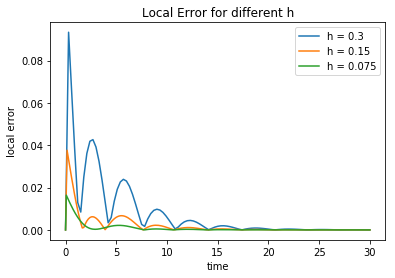

In [13]:
plt.plot(t1, local_error[0])
plt.plot(t2, local_error[1])
plt.plot(t3, local_error[2])
plt.xlabel("time")
plt.ylabel("local error")
labels = ["h = "+ str(t1[1] - t1[0]), "h = "+str(t2[1] - t2[0]), "h = "+str(t3[1] - t3[0]), "analytic"]
plt.legend(labels)
plt.title("Local Error for different h")
None

# Global Error

In [9]:
x_analytic_N1 = x_analytic = [analytic_damHarmOsc(j) for j in t1]
x_analytic_N2 = x_analytic = [analytic_damHarmOsc(j) for j in t2]
x_analytic_N3 = x_analytic = [analytic_damHarmOsc(j) for j in t3]

In [10]:
global_error_N1 = abs(x_analytic_N1 - x_N1_euler)
global_error_N2 = abs(x_analytic_N2 - x_N2_euler)
global_error_N3 = abs(x_analytic_N3 - x_N3_euler)

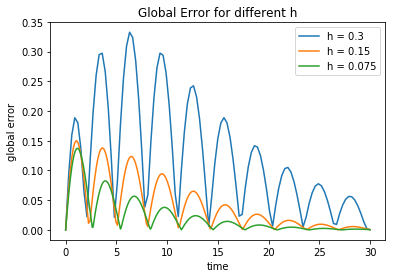

In [14]:
plt.plot(t1, global_error_N1)
plt.plot(t2, global_error_N2)
plt.plot(t3, global_error_N3)
plt.xlabel("time")
plt.ylabel("global error")
labels = ["h = "+ str(t1[1] - t1[0]), "h = "+str(t2[1] - t2[0]), "h = "+str(t3[1] - t3[0]), "analytic"]
plt.legend(labels)
plt.title("Global Error for different h")
None

In [12]:
# global_error = [abs(y1[i] - x_analytic[i]) for i in range(N)] 
# for i in range(len(global_error_N1)):
#     print("global_error at t_", i, ": ", global_error_N1[i])